In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(123)

In [2]:
x = np.linspace(-5,5,11)
print(x)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [3]:
error = np.random.normal(0,1,11) # create some errors
print(error)

[ 0.25112893  0.83131892 -0.19835292  0.34289927 -1.1170525   1.31356098
  0.49429011 -0.23492108 -1.46073159  0.50702075 -0.14772465]


In [4]:
y = 2*x + error
sd = np.ones(11)

<Container object of 3 artists>

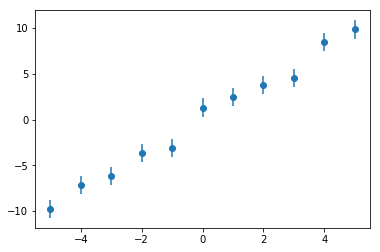

In [5]:
plt.errorbar(x,y,yerr=sd,fmt="o")

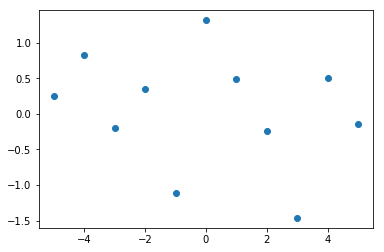

In [6]:
res = y - 2*x
plt.plot(x,res,"o")

In [7]:
p = np.polyfit(x,y,1)
print(p)

[ 1.93979187  0.05285784]


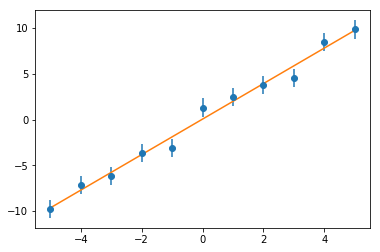

In [8]:
yfit = p[1] +p[0]*x
plt.errorbar(x,y,yerr=sd,fmt="o")
plt.plot(x,yfit)

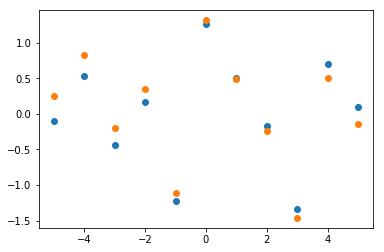

In [9]:
resfit = y - yfit
plt.plot(x,resfit,"o")
plt.plot(x,res,"o")

In [10]:
y2 = 2*x + 0.1*x**2 + np.random.normal(0,1,11)

In [11]:
p1 = np.polyfit(x,y2,1)
print(p1)

[ 1.95171323  1.03464802]


In [12]:
p2 = np.polyfit(x,y2,2)
print(p2)

[ 0.08769752  1.95171323  0.15767278]


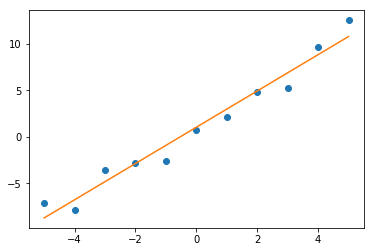

In [13]:
y2fit = p1[1] + p1[0]*x
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

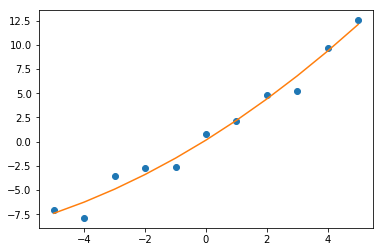

In [14]:
y2fit = p2[2] + p2[1]*x + p2[0]*x**2
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

In [23]:
chisq_list = []
for i in range(1000):
    y=2*x +np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

(array([ 0.01721786,  0.05096486,  0.08746672,  0.11226043,  0.09159901,
         0.08884415,  0.06887143,  0.04889872,  0.03650186,  0.03512443,
         0.02203886,  0.00757586,  0.01170814,  0.00206614,  0.00413229,
         0.00068871,  0.00137743,  0.        ,  0.00068871,  0.00068871]),
 array([  1.32379746,   2.77577829,   4.22775913,   5.67973997,
          7.1317208 ,   8.58370164,  10.03568247,  11.48766331,
         12.93964415,  14.39162498,  15.84360582,  17.29558666,
         18.74756749,  20.19954833,  21.65152917,  23.10351   ,
         24.55549084,  26.00747168,  27.45945251,  28.91143335,  30.36341419]),
 <a list of 20 Patch objects>)

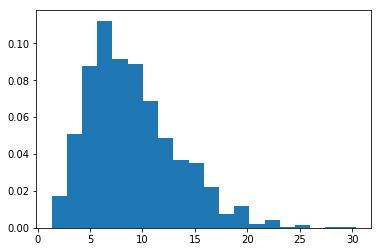

In [24]:
plt.hist(chisq,bins=20,normed=True)

In [25]:
print(chisq.mean())

9.0407477995


In [26]:
from scipy.stats import chi2

In [31]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,9)

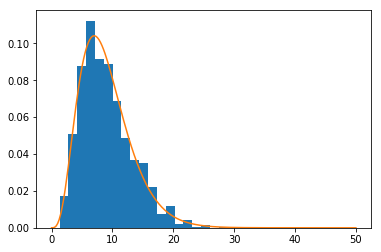

In [32]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [35]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

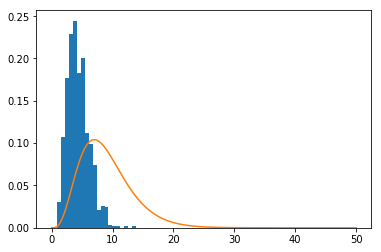

In [36]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [37]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,2)
    res = y-p[0]*x**2 - p[1]*x - p[2]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

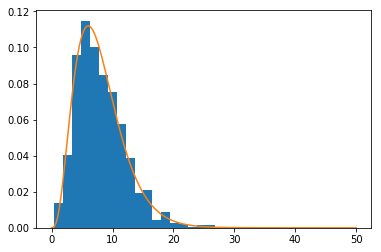

In [39]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,8)
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

(11, 1, 1)
(201, 201, 11)
(201, 201, 1)
(201, 201)


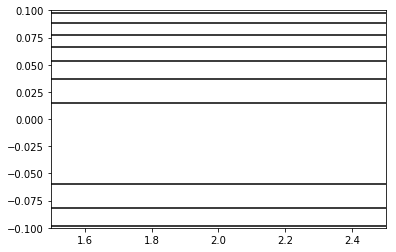

In [190]:
# let us plot the two-dimensional chi^2 distribution
m = np.linspace(1.5,2.5,201)
b = np.linspace(-0.1,.1,201)

def chi2linefit(m,b,datax,datay):
    x = datax.T[:,np.newaxis,np.newaxis]
    y = datay.T[:,np.newaxis,np.newaxis]
#    print(x.shape)
    res1 = datay[:,np.newaxis,np.newaxis]
    print(res1.shape)
    res2 = (m*x).T
    print(res2.shape)
    res3 = b[:,:,np.newaxis]
    print(res3.shape)
    res12 = res1 - res2.T
    res123 = res12.T - res3
    res123 = res123**2
    chisquare = np.sum(res123,axis=2)
    print(chisquare.shape)
    return chisquare

x = np.linspace(-5,5,11)
y=2*x + np.random.normal(0,1,11)
#print(x.shape,y.shape)


M,B = np.meshgrid(m,b)
#print(M.shape)
Z = chi2linefit(M,B,x,y)
plt.contour(M, B, Z, colors='black')

In [77]:
m = np.array([[1,2],[3,4]])
m.shape

(2, 2)

In [143]:
x = np.array([1,2,3]).T
x = x[:,np.newaxis,np.newaxis]
x.shape

(3, 1, 1)

In [140]:
m*x

array([[[ 1,  2],
        [ 3,  4]],

       [[ 2,  4],
        [ 6,  8]],

       [[ 3,  6],
        [ 9, 12]]])